# Practica Numpy 
 * Juan Pablo Cruz Gutierrez
 * Maria Fernanda Acosta Guerrero
 * Juan Diego Garcia Martinez
 * Daniel Felipe Rojas Paternina

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp

In [2]:
#Datos utilizando metodo de numpy
darray = np.genfromtxt('DatosCarro.csv',skip_header= 5,delimiter=",",missing_values=np.nan)
darray

array([[ 3.333333e-02, -1.370539e-03,  5.284468e-03,           nan,
                  nan,           nan,           nan],
       [ 6.665556e-02, -1.220805e-03,  5.291758e-03,  3.543324e-03,
         2.049132e-03,           nan,           nan],
       [ 1.000000e-01, -1.134318e-03,  5.421077e-03,  2.464951e-03,
         3.278516e-03, -5.748894e-03, -1.132636e-02],
       [ 1.333222e-01, -1.056475e-03,  5.510326e-03,  3.143724e-03,
         1.088194e-03,  2.993692e-02, -4.306341e-02],
       [ 1.666556e-01, -9.247710e-04,  5.493611e-03,  4.615224e-03,
        -2.824196e-05,  7.882154e-03, -2.040663e-02],
       [ 1.999889e-01, -7.487929e-04,  5.508443e-03,  3.934396e-03,
         1.342018e-04, -4.715259e-02,  4.766551e-02],
       [ 2.333333e-01, -6.624342e-04,  5.502560e-03,  1.192510e-03,
         2.596880e-03, -1.401027e-02,  7.226527e-02],
       [ 2.666556e-01, -6.692922e-04,  5.681568e-03,  2.419064e-03,
         5.737348e-03,  3.413034e-02,  4.795221e-02],
       [ 2.999889e-01, -

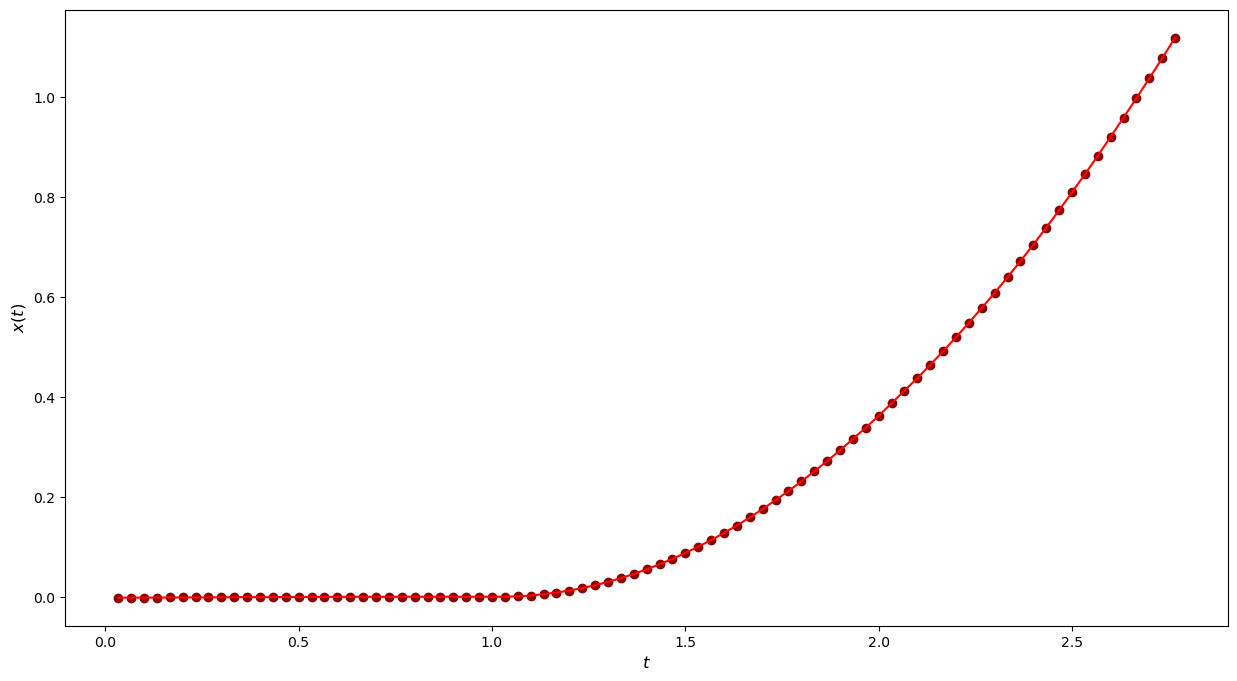

In [3]:
#Listas de tiempo y posición 
t = darray[:,0]
x = darray[:,1]
#plot t vs x
plt.figure(figsize=(15,8))
plt.plot(t,x,color='red')
plt.scatter(t,x,color='darkred')
plt.xlabel(r'$t$',fontsize=12)
plt.ylabel(r'$x(t)$',fontsize=12)
plt.show()

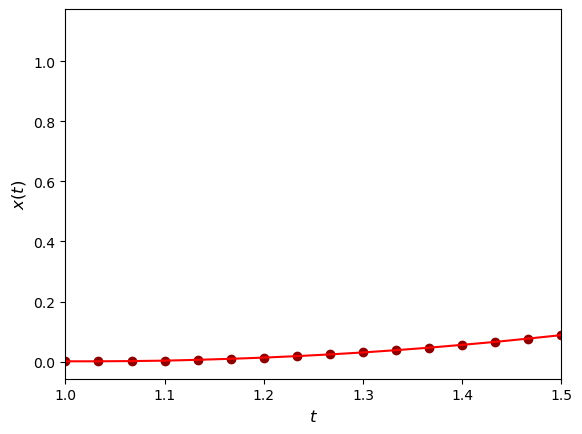

In [4]:
plt.plot(t,x,color='red')
plt.scatter(t,x,color='darkred')
plt.xlabel(r'$t$',fontsize=12)
plt.ylabel(r'$x(t)$',fontsize=12)
plt.xlim(1,1.5)
plt.show()

In [5]:
#Obtención del tiempo inicial y el número de dato correspondiente 
for i in range(0,len(t)):
    if t[i] > 1.2:
        t0 = t[i]
        n  = i
        print(f'{t0=},{n=}')
        break
    else:
        pass

t0=1.233333,n=36


In [6]:
tr  = t[n:]  #Lista de tiempo desde t0
xr  = x[n:]  #Lista de posiciónes desde x0
vxr = darray[n:,3] #Velocidad en x desde v0
axr = darray[n:,5] #Aceleración en x desde a0]

In [7]:
#Regresión no lineal de los datos 
def position(t,x0,vx0,ax):
    return x0 +vx0*t + ax*(t**2)*(1/2)
    
coe, Ecoe = sp.optimize.curve_fit(position,tr,xr)
coe, Ecoe

(array([ 0.32617897, -0.6847963 ,  0.7023423 ]),
 array([[ 8.30067819e-06, -8.52945888e-06,  4.17491736e-06],
        [-8.52945888e-06,  8.88942355e-06, -4.39981481e-06],
        [ 4.17491736e-06, -4.39981481e-06,  2.19991620e-06]]))

In [8]:
#Valores teoricos para posición, velocidad y aceleración con respecto a la regresión no lineal 
xt  = coe[0] + coe[1]*tr + coe[2]*(tr**2)*(1/2)
vxt = coe[1] + coe[2]*tr
axt = coe[2]

In [9]:
#Errores relativos
Ex  = np.abs(xr-xt)/xt
Evx = np.abs(vxr-vxt)/vxt
Eax = np.abs(axr-axt)/axt

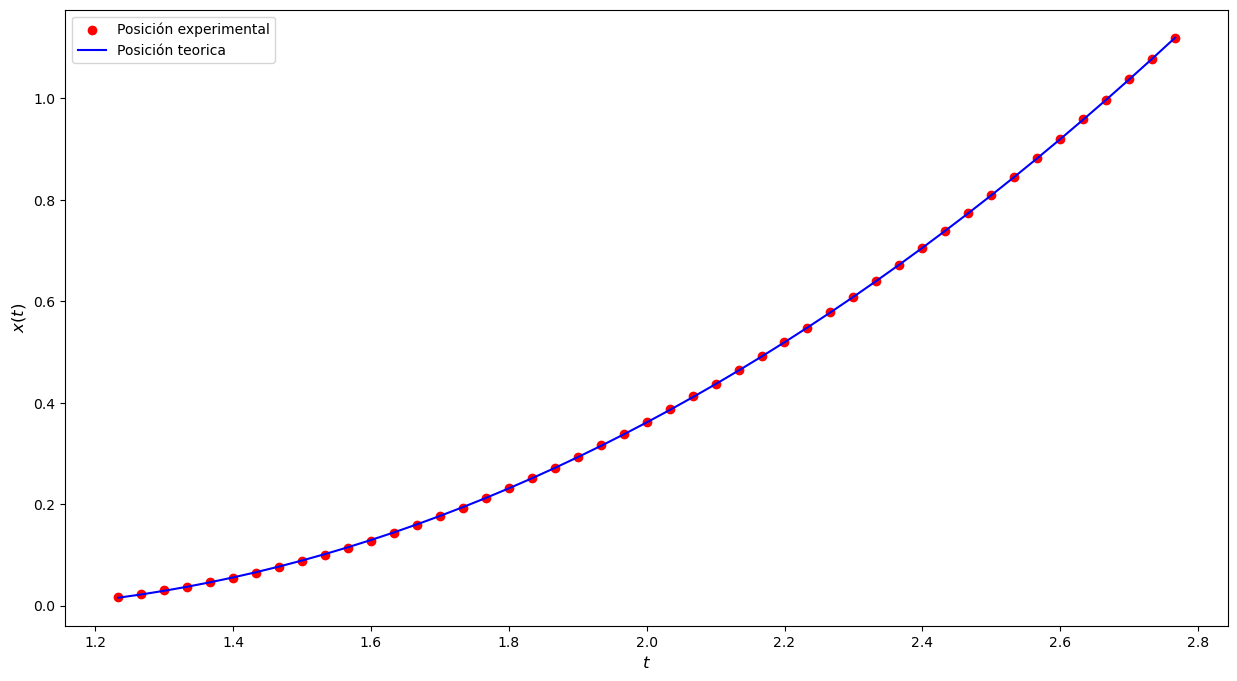

In [10]:
#Plot posiciones
plt.figure(figsize=(15,8))
plt.scatter(tr,xr,color='red',label='Posición experimental')
plt.plot(tr,xt,color='blue',label='Posición teorica')
plt.legend()
plt.xlabel(r'$t$',fontsize=12)
plt.ylabel(r'$x(t)$',fontsize=12)
plt.show()

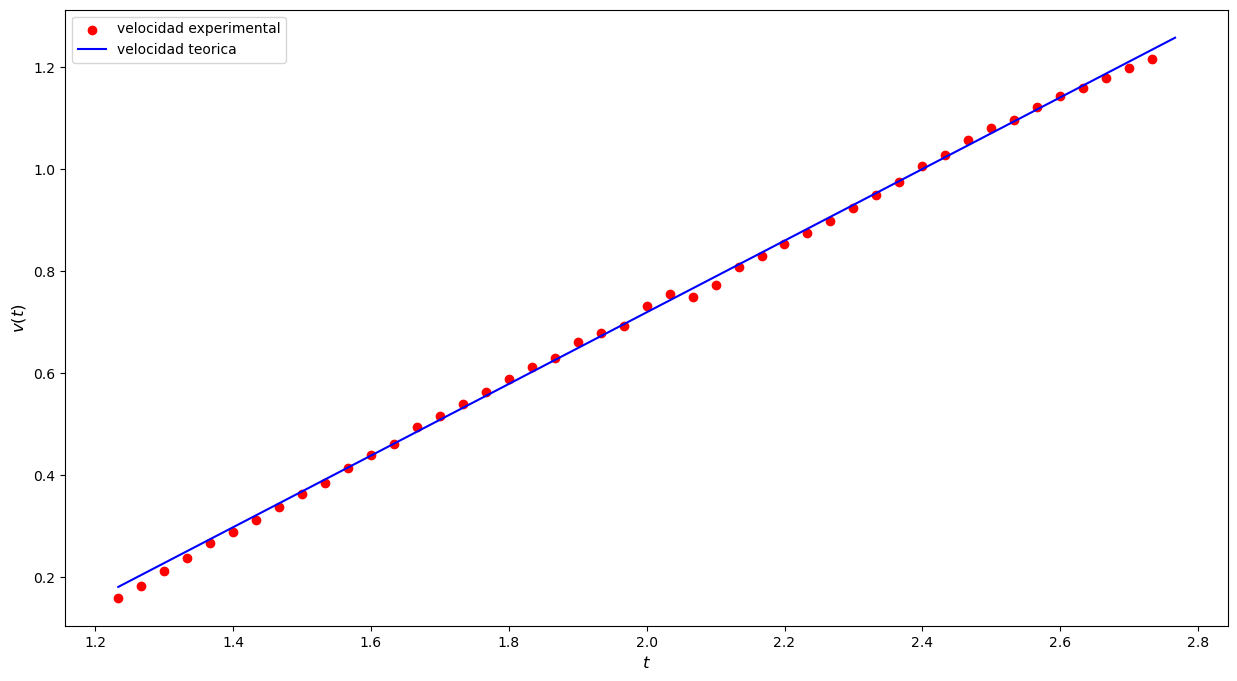

In [11]:
#Plor de la velocidad 
plt.figure(figsize=(15,8))
plt.scatter(tr,vxr,color='red',label='velocidad experimental')
plt.plot(tr,vxt,color='blue',label='velocidad teorica')
plt.legend()
plt.xlabel(r'$t$',fontsize=12)
plt.ylabel(r'$v(t)$',fontsize=12)
plt.show()

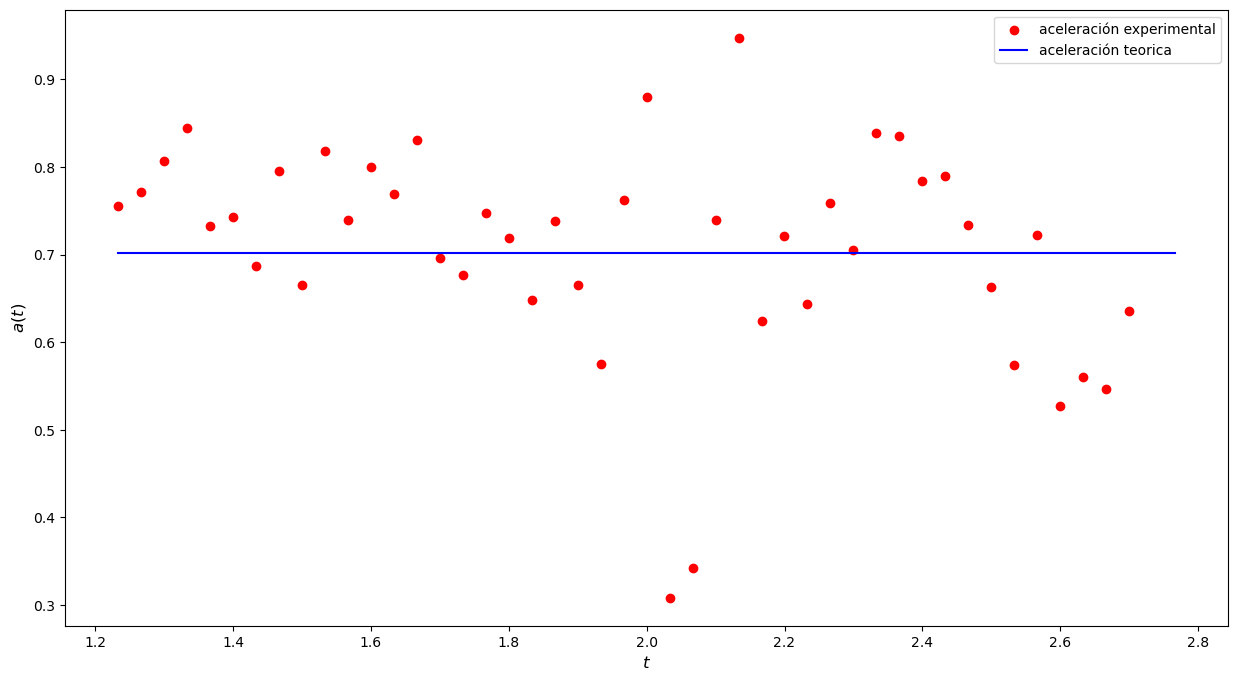

In [12]:
#Plot de la aceleración
plt.figure(figsize=(15,8))
plt.scatter(tr,axr,color='red',label='aceleración experimental')
plt.plot(tr,np.full(len(tr),axt),color='blue',label='aceleración teorica')
plt.legend()
plt.xlabel(r'$t$',fontsize=12)
plt.ylabel(r'$a(t)$',fontsize=12)
plt.show() 

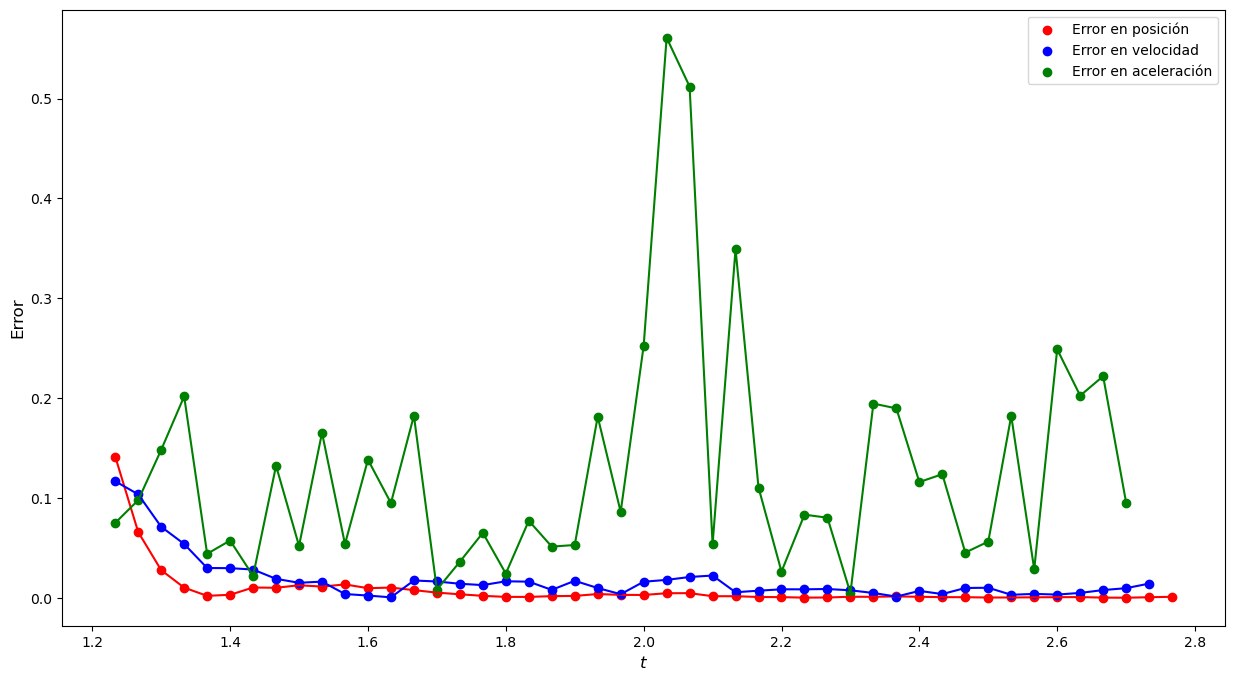

In [13]:
#Plot de los errores
plt.figure(figsize=(15,8))
plt.scatter(tr,Ex,color='red',label='Error en posición')
plt.scatter(tr,Evx,color='blue',label='Error en velocidad')
plt.scatter(tr,Eax,color='green',label='Error en aceleración')
plt.plot(tr,Ex,color='red')
plt.plot(tr,Evx,color='blue')
plt.plot(tr,Eax,color='green')
plt.legend()
plt.xlabel(r'$t$',fontsize=12)
plt.ylabel(r'Error',fontsize=12)
plt.show()

In [17]:
#Error porcentual entre la aceleración promedio y la celeración de la regresión
Promedio = np.mean(axr[0:-2])
Error = np.abs(Ap-axt)*100/axt
print(f'{Promedio = }, {Error=}')

Promedio = 0.7082434577777778, Error=0.8402111966488619
